# Investigating Pi(2000) Resource Utilisation

In [2]:
# Loading event json
import json
import math
# Plotting the timeline
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Job Completion

In [3]:
kube = {
    'start' : [1748292555, 1748292698, 1748292851],
    'end' : [1748292666, 1748292810, 1748292959],
}

spazio = {
    'start' : [1748294492, 1748294636, 1748294779],
    'end' : [1748294603, 1748294747, 1748294890],
}

## Resource Utilisation

In [8]:
def read_df(filepath):
    try:
        cpu = pd.read_csv(filepath)
        cpu['Time'] = pd.to_datetime(cpu['Time'], unit='ms')
        cpu = cpu.set_index('Time')
    
        # df.index = pd.to_datetime(df.index, errors='coerce')
        # df.info()

        return cpu
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [9]:
spazio_cpu = read_df('pi-2000-1000x-pod-cpu-util-spazio.csv')
spazio_mem = read_df('pi-2000-1000x-pod-mem-util-spazio.csv')
spazio_mem = spazio_mem.drop(columns=['10.244.25.199:32000'])

kube_cpu = read_df('pi-2000-1000x-pod-cpu-util-kube.csv')
kube_mem = read_df('pi-2000-1000x-pod-mem-util-kube.csv')
kube_mem = kube_mem.drop(columns=['10.244.20.254:32000'])


In [10]:
# Calculate the mean CPU utilization across all machines for each time point
job1 = cpu.loc[pd.to_datetime(spazio['start'][0], unit='s'): pd.to_datetime(spazio['end'][0], unit='s')]
job1.mean(axis=1).mean()


NameError: name 'cpu' is not defined

In [11]:
kube_mem

,10.244.1.173:32000,10.244.21.15:32000,10.244.22.190:32000,10.244.23.28:32000,10.244.24.156:32000,10.244.25.199:32000,10.244.26.148:32000,10.244.28.200:32000,10.244.29.56:32000,10.244.30.88:32000,10.244.31.26:32000,10.244.32.247:32000,10.244.33.120:32000,10.244.34.173:32000,10.244.36.32:32000,10.244.37.129:32000,10.244.38.32:32000,10.244.39.131:32000
Time,,,,,,,,,,,,,,,,,,
2025-05-26 20:48:50,10.132730,12.433739,11.242264,11.097401,11.740862,11.212696,11.821248,13.045965,11.262889,10.898591,11.857708,11.460060,11.746721,11.619577,11.657582,11.499481,11.272545,11.456201
2025-05-26 20:48:55,10.160648,12.438392,11.295292,11.125319,11.763634,11.214247,11.824350,13.058200,11.219289,10.898591,11.859259,11.486427,11.786973,11.636637,11.660684,11.502435,11.275647,11.462405
2025-05-26 20:49:00,10.191668,12.441493,11.295292,11.125319,11.766392,11.217349,11.824301,13.058200,11.193020,10.898542,11.859259,11.489529,11.786973,11.667657,11.711867,11.503986,11.275647,11.462405
2025-05-26 20:49:05,10.191668,12.450652,11.295292,11.123079,11.755067,11.223553,11.827255,13.058200,11.193020,10.804252,11.859259,11.404890,11.783748,11.697126,11.714969,11.508639,11.278749,11.468609
2025-05-26 20:49:10,10.191668,12.509515,11.295292,11.120838,11.758120,11.229757,11.827206,13.058200,11.292136,10.807354,11.863912,11.416953,11.782074,11.709534,11.716520,11.508639,11.346992,11.570973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26 20:56:25,10.277563,12.809692,11.386505,11.208850,11.795712,11.310236,11.681266,11.323068,11.458362,11.059425,11.769869,11.284282,12.038158,11.682428,11.564671,11.667011,11.088913,11.774005
2025-05-26 20:56:30,10.258754,12.808190,11.185419,11.228225,11.811813,11.324195,11.687420,11.437250,11.421803,11.061296,11.772626,11.287926,12.027523,11.665786,11.539535,11.680896,11.087608,11.780233
2025-05-26 20:56:35,10.270300,12.847383,11.181677,11.227807,11.818288,11.282146,11.677351,11.355146,11.298758,11.052163,11.775949,11.281820,12.040989,11.662093,11.548472,11.646602,11.091424,11.749903


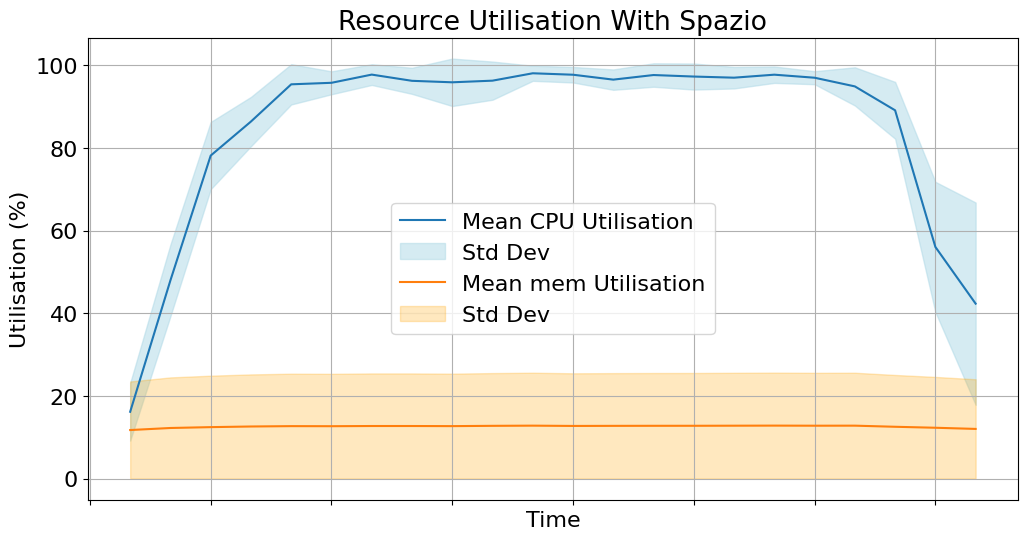

In [12]:
# Calculate the mean CPU utilization across all machines for each time point
cpu_mean = spazio_cpu.loc[pd.to_datetime(spazio['start'][0], unit='s'): pd.to_datetime(spazio['end'][0], unit='s')].mean(axis=1)

# Calculate the standard deviation of CPU utilization across all machines for each time point
cpu_std = spazio_cpu.loc[pd.to_datetime(spazio['start'][0], unit='s'): pd.to_datetime(spazio['end'][0], unit='s')].std(axis=1)

mem_mean = spazio_mem.loc[pd.to_datetime(spazio['start'][0], unit='s'): pd.to_datetime(spazio['end'][0], unit='s')].mean(axis=1)

# Calculate the standard deviation of mem utilization across all machines for each time point
mem_std = spazio_mem.loc[pd.to_datetime(spazio['start'][0], unit='s'): pd.to_datetime(spazio['end'][0], unit='s')].mean(axis=1)

# Plot the mean and standard deviation over time
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 16  
plt.plot(cpu_mean.index, cpu_mean, label='Mean CPU Utilisation')
plt.fill_between(cpu_mean.index, cpu_mean - cpu_std,
                 cpu_mean + cpu_std, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(mem_mean.index, mem_mean, label='Mean mem Utilisation')
plt.fill_between(mem_mean.index, mem_mean - mem_std,
                 mem_mean + mem_std, color='orange', alpha=0.25, label='Std Dev')
plt.tick_params(axis='x', labelbottom=False)
plt.title('Resource Utilisation With Spazio')
plt.xlabel('Time')
plt.ylabel('Utilisation (%)')
plt.legend()
plt.grid(True)
plt.savefig('../figures/pi-2000-1000x-pod-spazio-util.png')
plt.show()

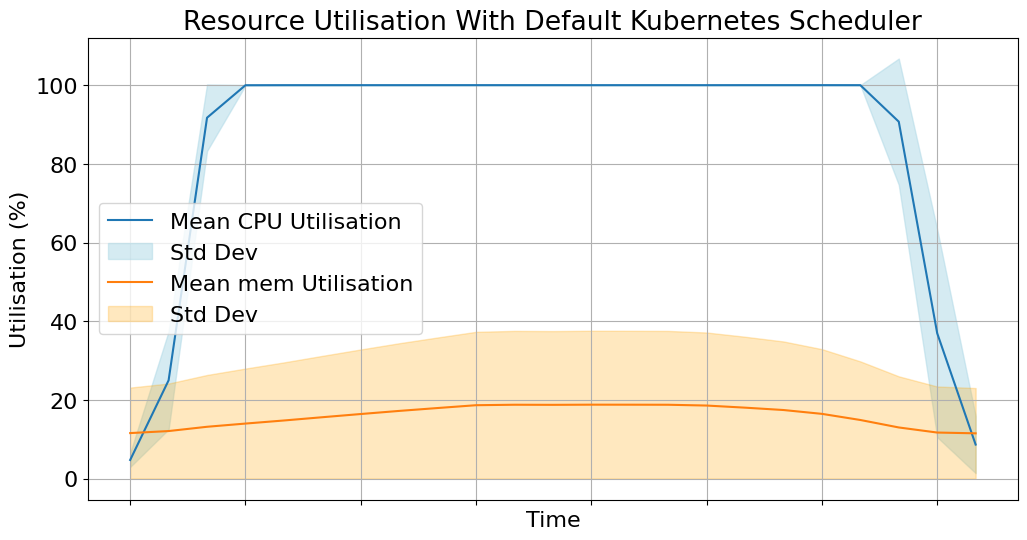

In [7]:
# Calculate the mean CPU utilization across all machines for each time point
cpu_mean = kube_cpu.loc[pd.to_datetime(kube['start'][0], unit='s'): pd.to_datetime(kube['end'][0], unit='s')].mean(axis=1)

# Calculate the standard deviation of CPU utilization across all machines for each time point
cpu_std = kube_cpu.loc[pd.to_datetime(kube['start'][0], unit='s'): pd.to_datetime(kube['end'][0], unit='s')].std(axis=1)

mem_mean = kube_mem.loc[pd.to_datetime(kube['start'][0], unit='s'): pd.to_datetime(kube['end'][0], unit='s')].mean(axis=1)

# Calculate the standard deviation of mem utilization across all machines for each time point
mem_std = kube_mem.loc[pd.to_datetime(kube['start'][0], unit='s'): pd.to_datetime(kube['end'][0], unit='s')].mean(axis=1)

# Plot the mean and standard deviation over time
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 16  
plt.plot(cpu_mean.index, cpu_mean, label='Mean CPU Utilisation')
plt.fill_between(cpu_mean.index, cpu_mean - cpu_std,
                 cpu_mean + cpu_std, color='lightblue', alpha=0.5, label='Std Dev')
plt.plot(mem_mean.index, mem_mean, label='Mean mem Utilisation')
plt.fill_between(mem_mean.index, mem_mean - mem_std,
                 mem_mean + mem_std, color='orange', alpha=0.25, label='Std Dev')
plt.tick_params(axis='x', labelbottom=False)
plt.title('Resource Utilisation With Default Kubernetes Scheduler')
plt.xlabel('Time')
plt.ylabel('Utilisation (%)')
plt.legend()
plt.grid(True)
plt.savefig('../figures/pi-2000-1000x-pod-kube-util.png')
plt.show()